# University Admit Eligibility Predictor

## PROBLEM STATEMENT

Students are often worried about their chances of admission to University. The aim of this project is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This analysis should also help students who are currently preparing or will be preparing to get a better idea.


## IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<you api key',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='<endpoint_url')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-cc7pckycexqjaa'
object_key = 'admission_predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

admission_df = pd.read_csv(body)
admission_df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [3]:
admission_df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

## PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000          0.72000  
75%      9.040000    1.000000          0.82000  
max      9.920000    1.000000          0.97000

In [8]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

GRE Score  TOEFL Score       SOP      LOR       CGPA  \
University Rating                                                          
1                  304.911765   100.205882  1.941176  2.426471  7.798529   
2                  309.134921   103.444444  2.682540  2.956349  8.177778   
3                  315.030864   106.314815  3.308642  3.401235  8.500123   
4                  323.304762   110.961905  4.000000  3.947619  8.936667   
5                  327.890411   113.438356  4.479452  4.404110  9.278082   

                   Research  Chance of Admit  
University Rating                             
1                  0.294118         0.562059  
2                  0.293651         0.626111  
3                  0.537037         0.702901  
4                  0.780952         0.801619  
5                  0.876712         0.888082

## PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

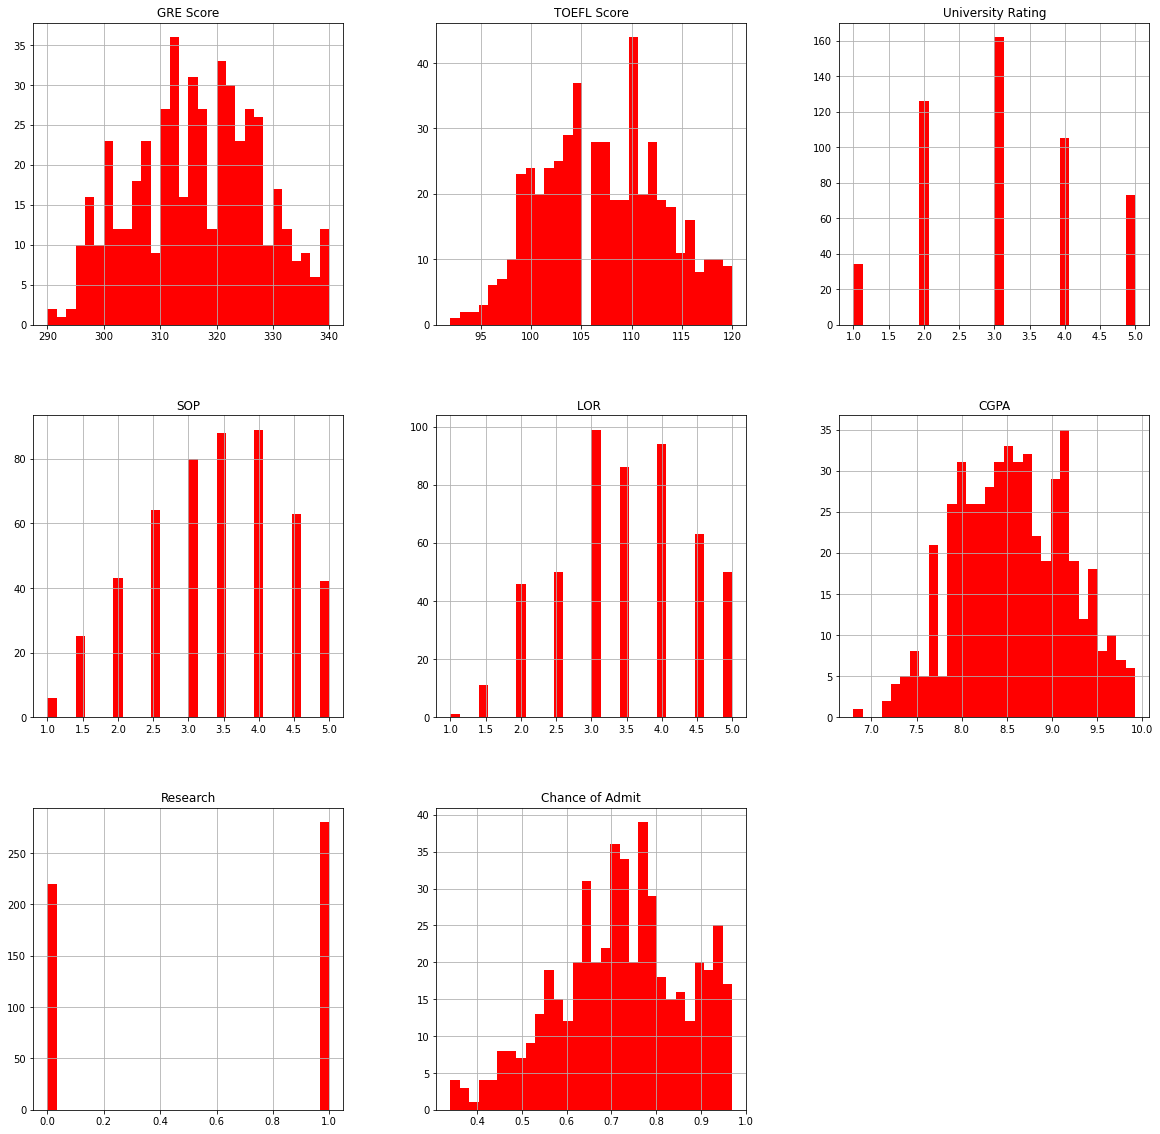

In [9]:
admission_df.hist(bins = 30, figsize = (20, 20), color='r')

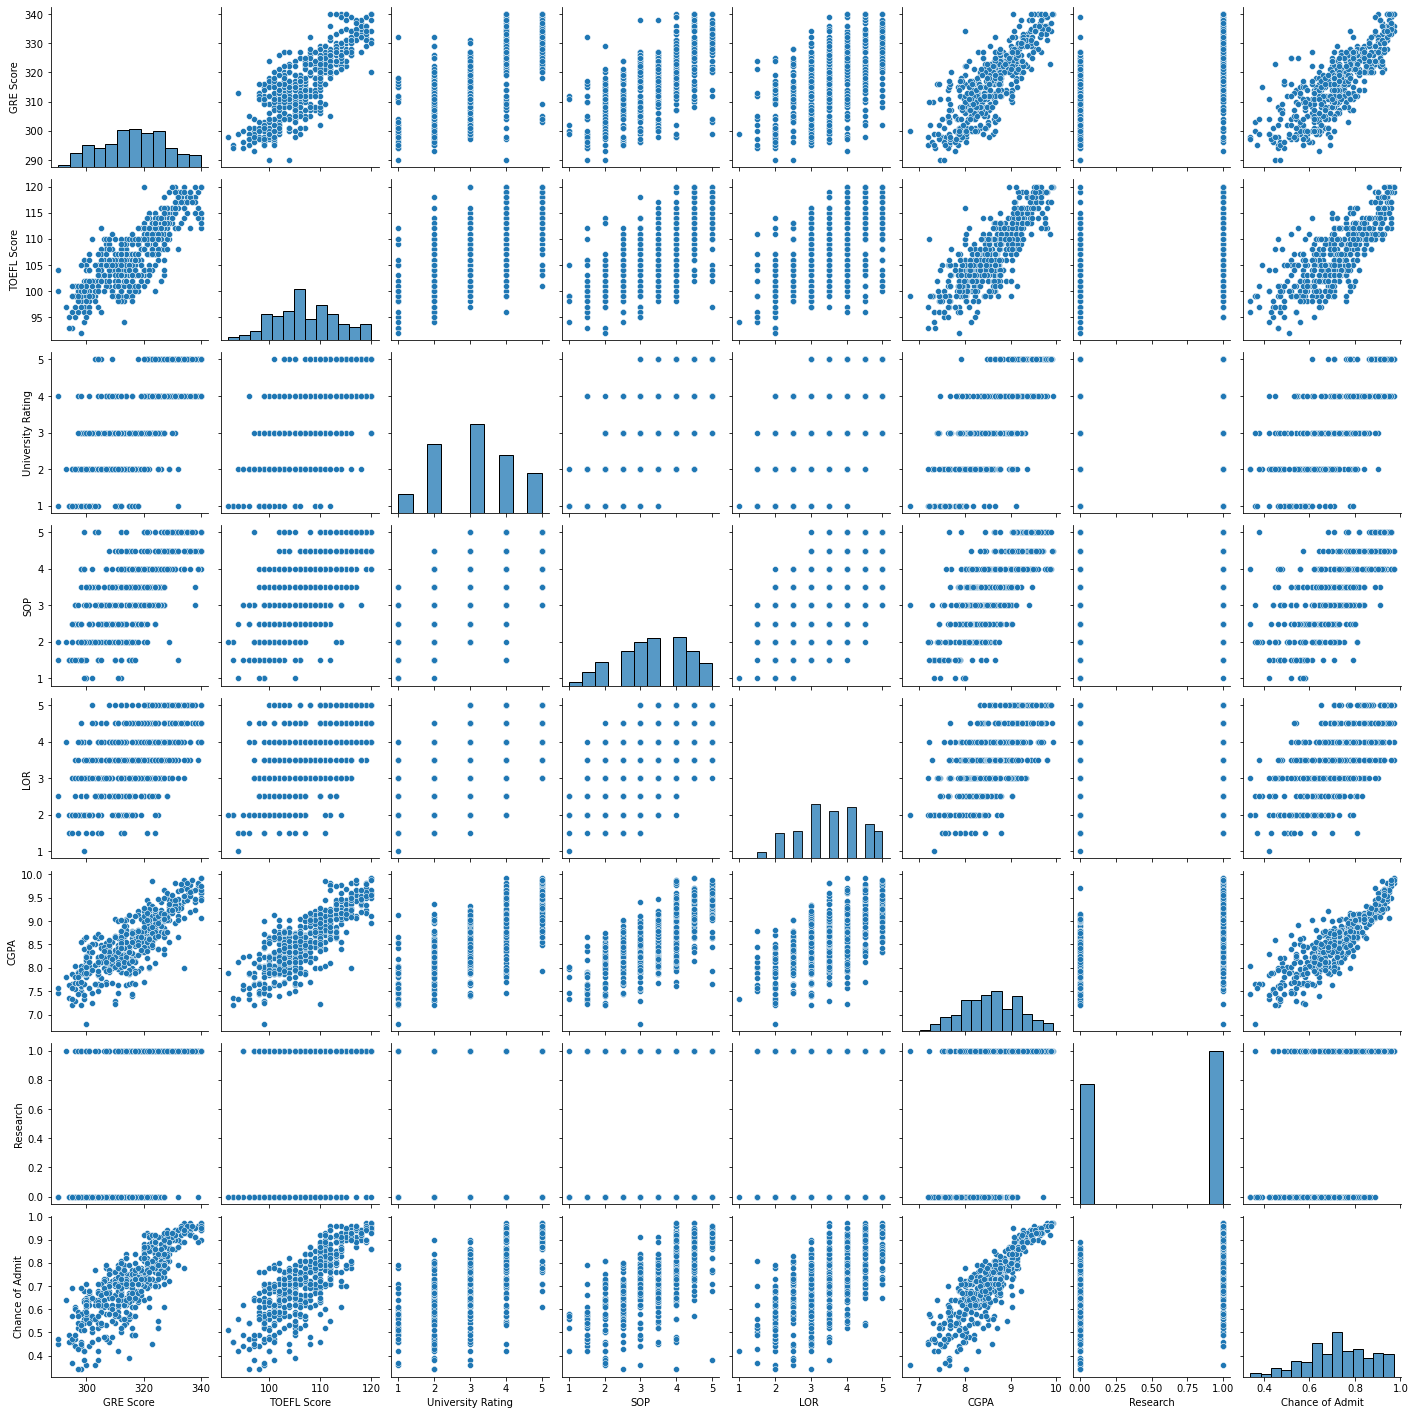

In [10]:
sns.pairplot(admission_df)

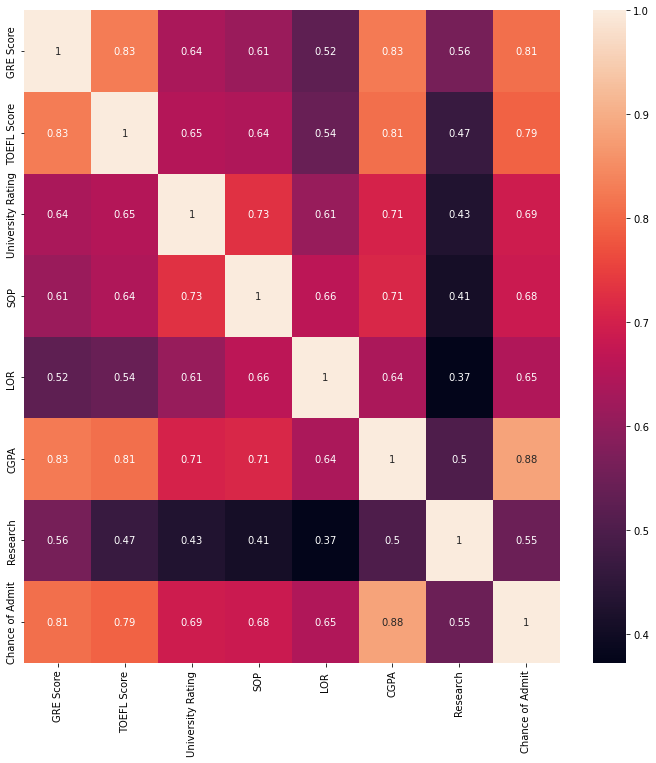

In [11]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## CREATE TRAINING AND TESTING DATASET

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = admission_df.drop(columns=['Chance of Admit'])

In [14]:
y = admission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
y = y.reshape(-1,1)

In [19]:
y.shape

(500, 1)

In [20]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [21]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [22]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [24]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
accuracy_LinearRegression = linear_regression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7831819001192665

In [39]:
!pip install -U ibm_watson_machine_learning

In [40]:
from ibm_watson_machine_learning import APIClient
import json

In [41]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "qClbj79GwiDuz-lelTFNtYzrzHPiEj7qzQVnvl0bHirG"
}

In [42]:
wml_client = APIClient(wml_credentials)

In [43]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
fb3f439f-11b4-4c30-9aeb-d794ed108bca  uaep  2022-11-13T07:14:36.279Z
------------------------------------  ----  ------------------------


In [44]:
SPACE_ID= "fb3f439f-11b4-4c30-9aeb-d794ed108bca"

In [45]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [47]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [48]:
import sklearn
sklearn.__version__

'1.0.2'

In [52]:
MODEL_NAME = 'University Admit Eligibility Predictor'
DEPLOYMENT_NAME = 'uaep'
DEMO_MODEL = linear_regression_model

In [53]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [54]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [57]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [58]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-13T07:54:46.972Z',
  'id': '0f04e10e-7365-4602-8a0a-9d0a8fe40221',
  'modified_at': '2022-11-13T07:54:50.962Z',
  'name': 'University Admit Eligibility Predictor',
  'owner': 'IBMid-667000D40I',
  'resource_key': '61d17606-b6f7-411b-977c-9c6ef80ab240',
  'space_id': 'fb3f439f-11b4-4c30-9aeb-d794ed108bca'},
 'system': {'warnings': []}}

In [59]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'0f04e10e-7365-4602-8a0a-9d0a8fe40221'

In [60]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [61]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '0f04e10e-7365-4602-8a0a-9d0a8fe40221' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='80d03055-cefc-404a-8502-e1be5e99c2ae'
------------------------------------------------------------------------------------------------


